## Exercise 4.8.14 {.unnumbered}

> In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

As always, we start by importing the data, with index column set to name. We also import Numpy.


In [2]:
import numpy as np
import pandas as pd
auto = pd.read_csv("data/Auto.csv", index_col="name")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


The `auto` data must be massaged a little more before usage. Take a look at the `info`:


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 27.9+ KB


Here horsepower has type `object`; this is must be an error, because horsepower is a number, and should thus be `float64` or another numeric type.

The error is caused by missing values encoded as "?", as we can see here:


In [4]:
np.unique(auto["horsepower"])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

To remedy this, must call `read_csv` again, but with the special `na_values` argument. Moreover, we remove all rows containing `na` using the `dropna` method.


In [5]:
auto = pd.read_csv("data/Auto.csv", na_values="?", index_col="name").dropna()

## (a)
> Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. [...]

The column `mpg01` can be inserted as follows. Observe the `1*`-trick, which converts boolean values (`TRUE`/`FALSE`) into `1` and `0`.


In [6]:
import numpy as np
import pandas as pd
auto["mpg01"] = 1*(auto["mpg"] > auto["mpg"].median())

## (b)
> Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

The `pairplot` function from `seaborn` is what we want. Since we're mainly interested in the association between the covariates and `mpg01`, we may use the argument `y_vars` to restrict the pairplot to these variables; but be aware that plots with categorical values tend to not very informative.

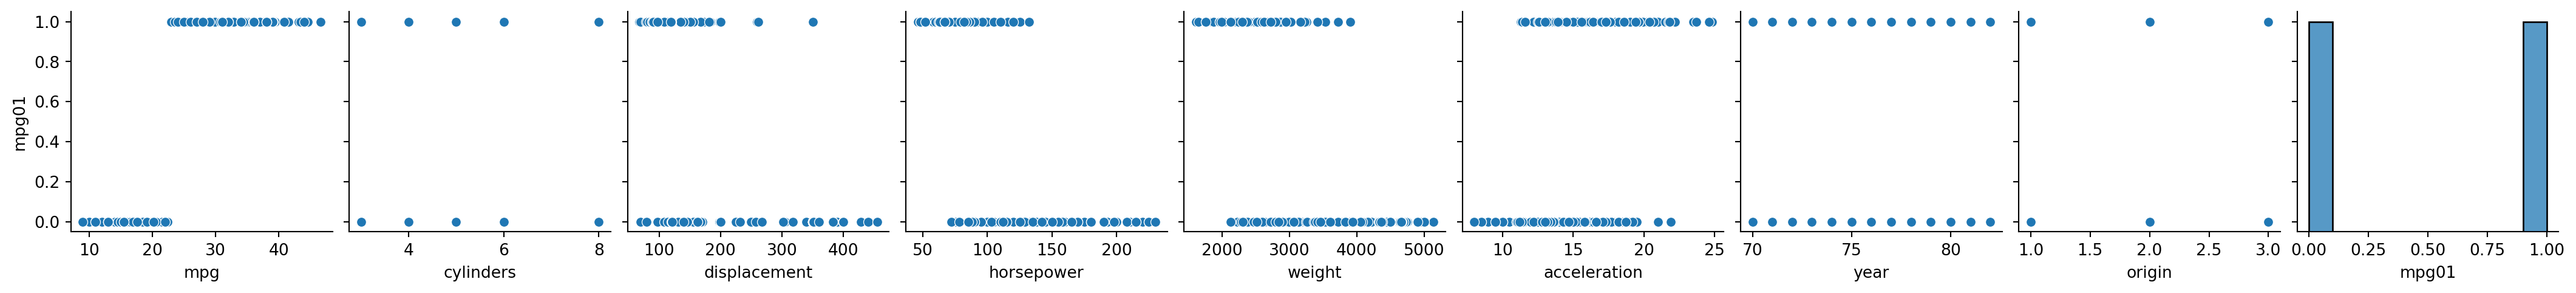

In [7]:
import seaborn as sns
import matplotlib.pylab as plt
sns.pairplot(auto, y_vars = ["mpg01"])
plt.show()

What do we see? First, `mpg` is strongly associated with `mpg01`, but that's by definition. The other plots are hard to read. It might help to look at a correlation matrix instead.


In [8]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


Now we see a sizeable correlation between `mpg01` and most covariates, with the relatively high `0.32` for acceleration being the highest. Also observe that `cylinders`, `weight`,  `horsepower`, and `displacement` are highly correlated. Recall that we call this *multicollinearity*, and it's best not to use all of them in a single model.

## (c)
> Split the data into a training set and a test set.

This is most easily done using `train_test_split`. But first we need to remove every covariate we don't need from `auto`. This includes `mpg0`, `mpg`, and `name`.


In [9]:
from sklearn.model_selection import train_test_split
X = auto.drop(["mpg01", "mpg"], axis = 1)
y = auto["mpg01"]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   random_state=313,  
                                   test_size=0.20,  
                                   shuffle=True) 

## (d)
>  Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

Due to high multicollinearity we go only with `cylinders`, not `cylinders`, `weight`,  `horsepower`, and `displacement`. We also include `acceleration`, `origin`, and `year` due to their clear associations. *There are many valid solutions to this exercise! You need to show that you understand how to select reasonable variables and that you know about multicollinearity.*


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
features = ["cylinders", "acceleration", "origin", "year"]
fit = LDA().fit(X_train[features], y_train)

We find the test error using the `score` method.


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
fit = LDA().fit(X_train[features], y_train)
LDA_score = fit.score(X_test[features], y_test)
LDA_score

0.9240506329113924

## (e)
> Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

We do the same as last time, but with QDA instead of LDA. 

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
fit = QDA().fit(X_train[features], y_train)
QDA_score = fit.score(X_test[features], y_test)
QDA_score

0.9367088607594937

The QDA score is better than the LDA score.

## (f)
> Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?


In [13]:
from sklearn.linear_model import LogisticRegression as Logit
fit = Logit().fit(X_train[features], y_train)
logit_score = fit.score(X_test[features], y_test)
logit_score

0.8987341772151899

## (g)
> Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?


In [14]:
from sklearn.naive_bayes import GaussianNB as NB
fit = NB().fit(X_train[features], y_train)
nb_score = fit.score(X_test[features], y_test)
nb_score

0.9113924050632911

## (h)

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_test_scores = [KNN(k).fit(X_train[features], y_train).score(X_test[features], y_test) for k in range(1,40)]

Let's plot the `knn_scores`; see Figure 2.17 in the book. To do this we need the training error too:


In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_train_scores = [KNN(k).fit(X_train[features], y_train).score(X_train[features], y_train) for k in range(1,40)]

Then we can plot a similar plot as Figure 2.17. This plot demonstrates the difference between training and test error and allows us to choose a reasonable value for $k$.


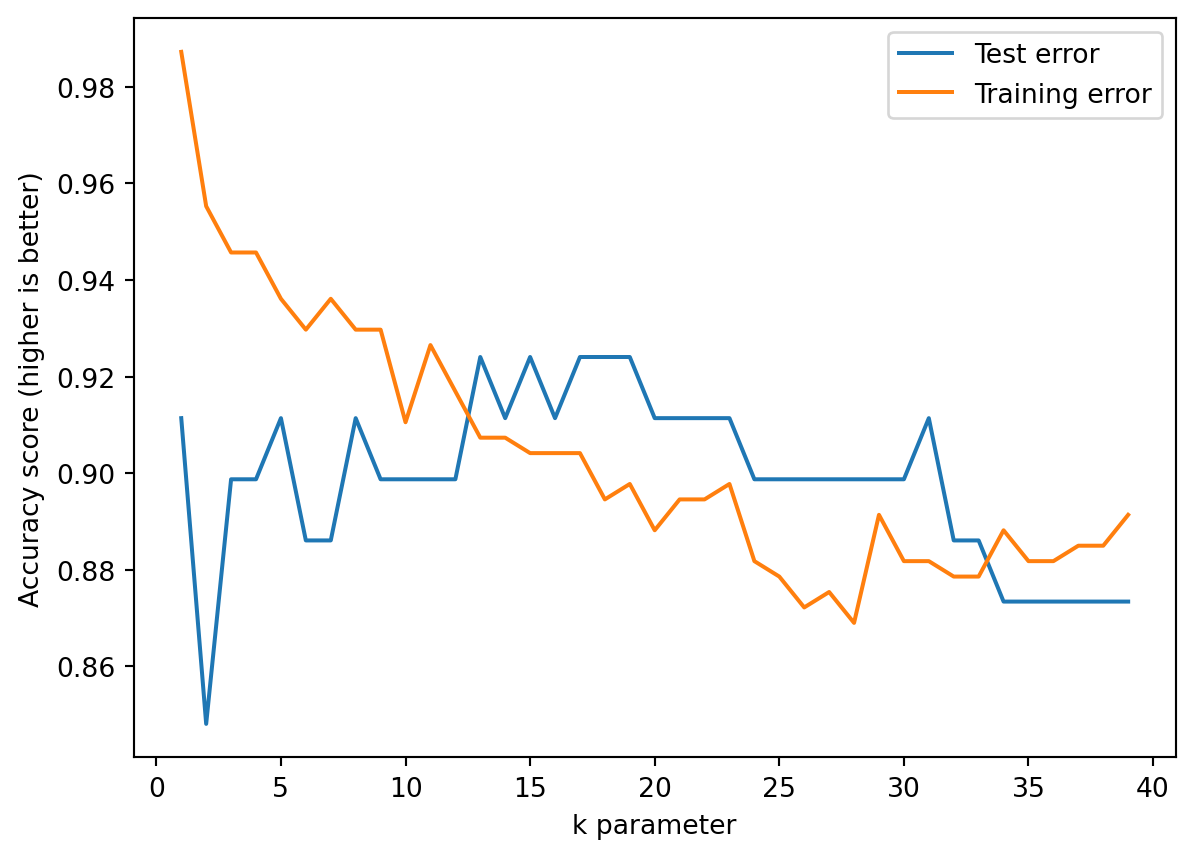

In [17]:
import matplotlib.pylab as plt
plt.clf()
plt.plot(np.arange(1,40), knn_test_scores, label="Test error")
plt.plot(np.arange(1,40), knn_train_scores, label="Training error")
plt.xlabel("k parameter")
plt.ylabel("Accuracy score (higher is better)")
plt.legend(loc="upper right")
plt.show()

It appears that $k$ between $\approx15$ and $\approx20$ would work well. The accuracy for $k=16$ is

In [18]:
knn_score = knn_test_scores[16]
knn_score

0.9240506329113924

In conclusion we get the following scores:

| Method | Score |
| -----  | ----  |
| LDA    | `{python} round(LDA_score,3)` |
| QDA    | `{python} round(QDA_score,3)` |
| Logistic | `{python} round(logit_score,3)` |
| Naive Bayes | `{python} round(nb_score,3)` |
| KNN(16) | `{python} round(knn_score,3)` |